In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv(r'/content/Dataset .csv')

In [ ]:
features = [ 'Price range', 'Aggregate rating', 'Votes', 'Currency', 'Has Online delivery']
target = 'Cuisines'

In [ ]:
df = df.dropna(subset=[target])


In [ ]:
X = df[features]
y = df[target]


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=features)


In [ ]:
categorical_cols = X_imputed.select_dtypes(include='object').columns
numerical_cols = X_imputed.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded, test_size=0.2, random_state=42)


In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 5: Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Price range', 'Aggregate rating', 'Votes', 'Currency',
       'Has Online delivery'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
from sklearn.metrics import classification_report

# Get the unique encoded labels present in y_test
labels_in_test = np.unique(y_test)

# Use inverse_transform to get the class names for only those labels
target_names_filtered = label_encoder.inverse_transform(labels_in_test)

# Generate the classification report for filtered labels
print("\nClassification Report:\n", classification_report(
    y_test,
    y_pred,
    labels=labels_in_test,
    target_names=target_names_filtered
))



Classification Report:
                                                                                           precision    recall  f1-score   support

                                                               Afghani, Mughlai, Chinese       0.00      0.00      0.00         1
                                                                                American       0.00      0.00      0.00         3
                                                                    American, BBQ, Steak       0.00      0.00      0.00         3
                                                                      American, Bar Food       0.00      0.00      0.00         1
                                                                     American, Breakfast       0.00      0.00      0.00         1
                                                              American, Breakfast, Greek       0.00      0.00      0.00         1
                                                                

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-26-c19f4b9a0222>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='Blues_d')


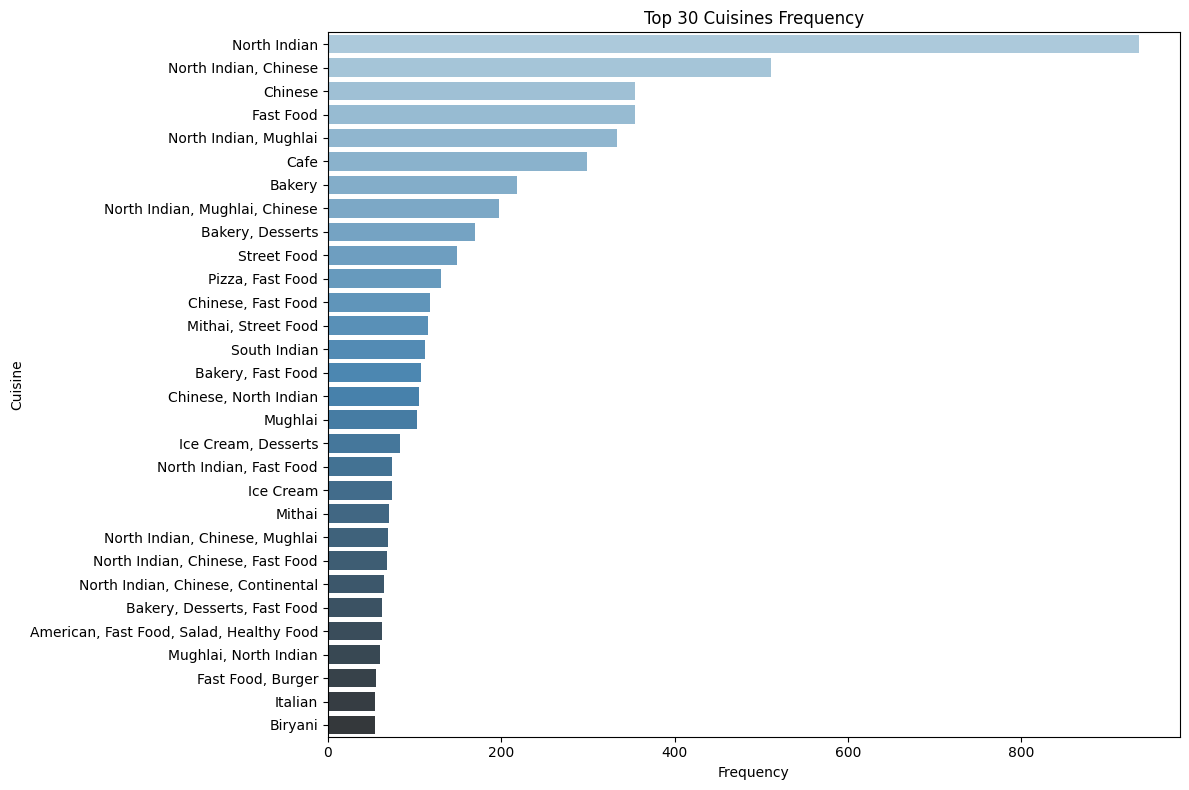

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_n = 30
top_cuisines = df['Cuisines'].value_counts().nlargest(top_n).index
df_filtered = df[df['Cuisines'].isin(top_cuisines)].copy()
cuisine_counts = df_filtered['Cuisines'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='Blues_d')
plt.title(f"Top {top_n} Cuisines Frequency")
plt.xlabel("Frequency")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()


<ipython-input-25-f3411a0f4efa>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="Blues_d")


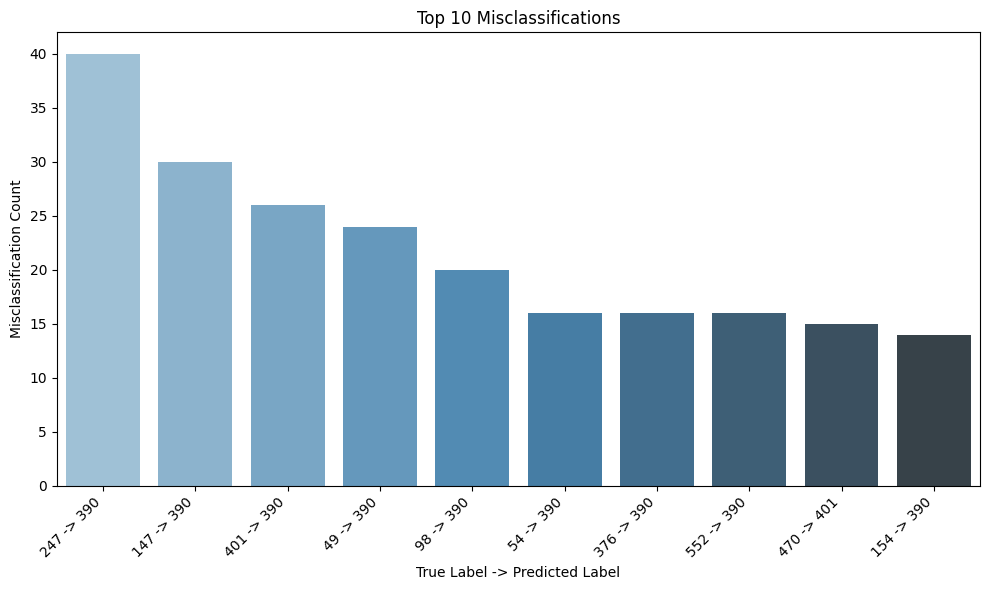

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
misclassified = np.argwhere(cm != 0)
misclassifications = []
for i, j in misclassified:
    if i != j:
        misclassifications.append((i, j, cm[i, j]))

misclassifications = sorted(misclassifications, key=lambda x: x[2], reverse=True)
N = 10
misclassifications = misclassifications[:N]
labels = [f"{i} -> {j}" for i, j, _ in misclassifications]
counts = [count for _, _, count in misclassifications]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts, palette="Blues_d")
plt.title(f"Top {N} Misclassifications")
plt.xlabel("True Label -> Predicted Label")
plt.ylabel("Misclassification Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
